# 2022 NZMSA Data Science Submission.

In [309]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline


# Exploratory Data Analysis.

In [310]:
dataset = pd.read_csv("weather-data.csv")
dataset.head() # Show the first five results.

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [311]:
#Showing the numerical values of:
#Average
#Standard deviation
#Percentile range: 25th and 75th

dataset.describe().loc[['mean','std','25%','75%']]

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN


In [312]:
#Checking for any null values

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   station         103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


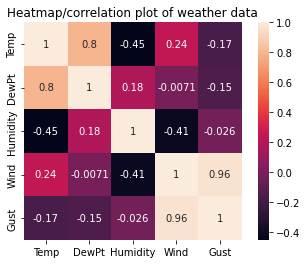

In [313]:
#Correlation plot
new_dataset = dataset.drop(['peak_wind_drct'], axis=1)
new_dataset.columns = ['Station', 'Valid', 'Temp', 'DewPt','Humidity','Wind','Gust']
ax = plt.axes()
sns.heatmap(new_dataset.corr(),square=True,annot=True, ax=ax)
ax.set_title('Heatmap/correlation plot of weather data')
plt.show()

In [314]:
#Comments

In [315]:
#Converting 'valid' column to datetime to allow for time series plots
dataset['valid'] = dataset['valid'].astype('datetime64[ns]')

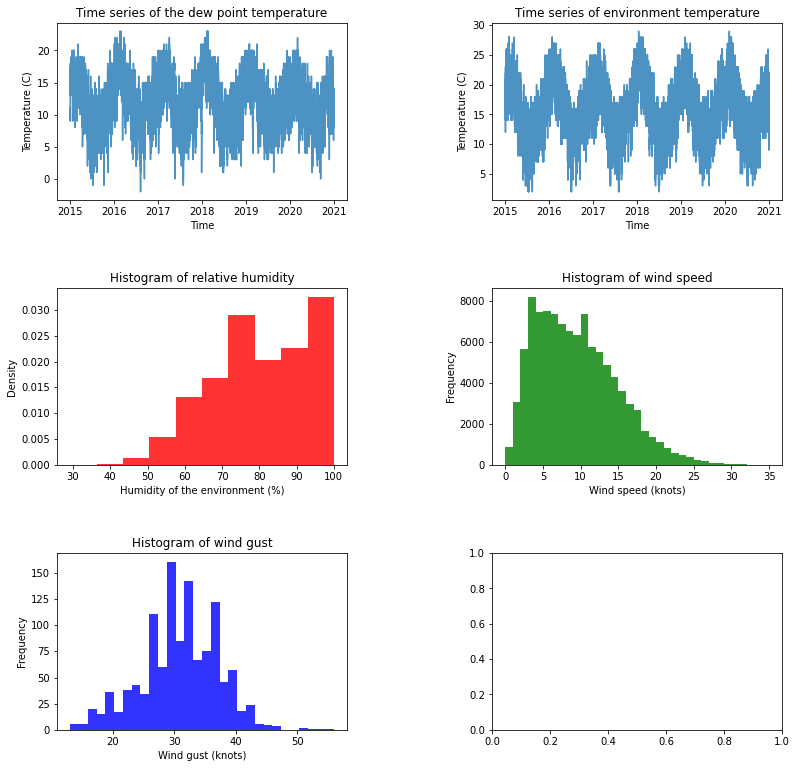

In [316]:
figure, axis = plt.subplots(3,2, figsize =(13,13))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

axis[0,0].plot(dataset['valid'], dataset['dwpc'], alpha=0.8);
axis[0,0].set_ylabel("Temperature (C)");
axis[0,0].set_xlabel("Time");
axis[0,0].set_title("Time series of the dew point temperature");

axis[0,1].plot(dataset['valid'], dataset['tmpc'], alpha=0.8);
axis[0,1].set_ylabel("Temperature (C)");
axis[0,1].set_xlabel("Time");
axis[0,1].set_title("Time series of environment temperature");

axis[1,0].hist(dataset['relh'],10, density=True, facecolor ='r', alpha =0.8);
axis[1,0].set_xlabel("Humidity of the environment (%)");
axis[1,0].set_ylabel("Density");
axis[1,0].set_title("Histogram of relative humidity");

axis[1,1].hist(dataset['sknt'], 35, density=False, facecolor='g', alpha = 0.8, range=[0,35]);
axis[1,1].set_xlabel("Wind speed (knots)");
axis[1,1].set_ylabel("Frequency");
axis[1,1].set_title("Histogram of wind speed");

axis[2,0].hist(dataset['gust'], 30, facecolor ='b', alpha=0.8);
axis[2,0].set_xlabel("Wind gust (knots)");
axis[2,0].set_ylabel("Frequency");
axis[2,0].set_title("Histogram of wind gust");

# Data Processing

In [317]:
dataset.head()

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30:00,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30:00,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00:00,21.0,12.0,56.38,16.0,NaN,NaN


In [318]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   station         103713 non-null  object        
 1   valid           103713 non-null  datetime64[ns]
 2   tmpc            103678 non-null  float64       
 3   dwpc            103678 non-null  float64       
 4   relh            103593 non-null  float64       
 5   sknt            103704 non-null  float64       
 6   gust            1203 non-null    float64       
 7   peak_wind_drct  0 non-null       float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 6.3+ MB


In [319]:
#Making the decision to drop both the gust and peak wind gust direction as there isn't
#sufficient data as shown by the low number of non-null counts. 
dataset.drop(columns=['gust', 'peak_wind_drct'], inplace=True)
dataset.head()

,station,valid,tmpc,dwpc,relh,sknt
0,NZAA,2015-01-01 00:00:00,21.0,11.0,52.77,15.0
1,NZAA,2015-01-01 00:30:00,21.0,10.0,49.37,16.0
2,NZAA,2015-01-01 01:00:00,21.0,12.0,56.38,16.0
3,NZAA,2015-01-01 01:30:00,21.0,13.0,60.21,16.0
4,NZAA,2015-01-01 02:00:00,21.0,12.0,56.38,16.0


In [320]:
#There were still some rows that contained null values for any of the given data types
#I decided to remove all rows that contained null values, as there weren't that many compared to the total sample size
dataset = dataset.dropna(axis=0, how='any')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103584 entries, 0 to 103712
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   station  103584 non-null  object        
 1   valid    103584 non-null  datetime64[ns]
 2   tmpc     103584 non-null  float64       
 3   dwpc     103584 non-null  float64       
 4   relh     103584 non-null  float64       
 5   sknt     103584 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 5.5+ MB


In [321]:
#Checking whether or not the stations column contains anything other than NZAA
print('NZAA' not in set(dataset['station']))
#As it returns false, it means all the data comes from station NZAA, so we can drop that column as its constant
dataset.drop(columns=['station'], inplace=True)
dataset.head()

False


,valid,tmpc,dwpc,relh,sknt
0,2015-01-01 00:00:00,21.0,11.0,52.77,15.0
1,2015-01-01 00:30:00,21.0,10.0,49.37,16.0
2,2015-01-01 01:00:00,21.0,12.0,56.38,16.0
3,2015-01-01 01:30:00,21.0,13.0,60.21,16.0
4,2015-01-01 02:00:00,21.0,12.0,56.38,16.0


In [322]:
#Dropping the date time column as everything is in chronological order anyways
dataset.drop(columns=['valid'], inplace=True)
dataset.head()

,tmpc,dwpc,relh,sknt
0,21.0,11.0,52.77,15.0
1,21.0,10.0,49.37,16.0
2,21.0,12.0,56.38,16.0
3,21.0,13.0,60.21,16.0
4,21.0,12.0,56.38,16.0


In [323]:
from sklearn.model_selection import train_test_split
#If we were to predict temperature of environment
x_train, x_test, y_train, y_test = train_test_split(dataset[['dwpc', 'relh', 'sknt']], dataset['tmpc'], test_size=0.2)

In [324]:
y_train.to_frame().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82867 entries, 24083 to 80192
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmpc    82867 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB


In [325]:
y_test.to_frame().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20717 entries, 93440 to 29881
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmpc    20717 non-null  float64
dtypes: float64(1)
memory usage: 323.7 KB


In [326]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20717 entries, 93440 to 29881
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dwpc    20717 non-null  float64
 1   relh    20717 non-null  float64
 2   sknt    20717 non-null  float64
dtypes: float64(3)
memory usage: 647.4 KB


In [327]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82867 entries, 24083 to 80192
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dwpc    82867 non-null  float64
 1   relh    82867 non-null  float64
 2   sknt    82867 non-null  float64
dtypes: float64(3)
memory usage: 2.5 MB


# Data Modelling

In [328]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import linear_model

#creating target columns (tomorrows data)
dataset['tmpc_target'] = dataset.shift(-1)['tmpc']
dataset['dwpc_target'] = dataset.shift(-1)['dwpc']
dataset['sknt_target'] = dataset.shift(-1)['sknt']
dataset['relh_target'] = dataset.shift(-1)['relh']
dataset = dataset.iloc[:-1,:].copy()
dataset

,tmpc,dwpc,relh,sknt,tmpc_target,dwpc_target,sknt_target,relh_target
0,21.0,11.0,52.77,15.0,21.0,10.0,16.0,49.37
1,21.0,10.0,49.37,16.0,21.0,12.0,16.0,56.38
2,21.0,12.0,56.38,16.0,21.0,13.0,16.0,60.21
3,21.0,13.0,60.21,16.0,21.0,12.0,16.0,56.38
4,21.0,12.0,56.38,16.0,21.0,12.0,13.0,56.38
...,...,...,...,...,...,...,...,...
103707,18.0,14.0,77.45,5.0,19.0,14.0,5.0,72.74
103708,19.0,14.0,72.74,5.0,19.0,14.0,6.0,72.74
103709,19.0,14.0,72.74,6.0,20.0,14.0,6.0,68.35
103710,20.0,14.0,68.35,6.0,20.0,14.0,7.0,68.35


In [329]:
#For predicting tmpc
tmpc_features = ['dwpc', 'relh', 'sknt', 'tmpc']
X = dataset[tmpc_features]
y = dataset.tmpc_target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

tmpc_model = DecisionTreeRegressor()
tmpc_model.fit(x_train, y_train)
tmpc_model.score(x_test, y_test)

0.9704708730917652

In [330]:
#For predicting dwpc
dwpc_features = ['dwpc', 'relh', 'tmpc']
X = dataset[dwpc_features]
y = dataset.dwpc_target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dwpc_model = DecisionTreeRegressor()
dwpc_model.fit(x_train, y_train)
dwpc_model.score(x_test, y_test)

0.9651120332899539

In [331]:
#For predicting relh
relh_features = ['dwpc', 'tmpc', 'relh']
X = dataset[relh_features]
y = dataset.relh_target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

relh_model = DecisionTreeRegressor()
relh_model.fit(x_train, y_train)
relh_model.score(x_test, y_test)

0.8752200887942296

In [332]:
#predicting sknt
sknt_features = ['relh', 'sknt']
X = dataset[sknt_features]
y = dataset.sknt_target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

sknt_model = DecisionTreeRegressor()
sknt_model.fit(x_train, y_train)
sknt_model.score(x_test, y_test)

0.8613781081283507

In [364]:
#Using the very last months data as the testing set
test = dataset.iloc[-1440:,:].copy()
test.drop(columns=['tmpc_target', 'dwpc_target', 'sknt_target', 'relh_target'], inplace=True)
test.head()

,tmpc,dwpc,relh,sknt
102271,18.0,14.0,77.45,20.0
102272,19.0,14.0,72.74,19.0
102273,19.0,14.0,72.74,21.0
102274,19.0,14.0,72.74,20.0
102275,19.0,14.0,72.74,19.0


In [365]:
tmpc_features = ['dwpc', 'relh', 'sknt', 'tmpc' ]
dwpc_features = ['dwpc', 'relh', 'tmpc' ]
relh_features = ['dwpc', 'tmpc', 'relh' ]
sknt_features = ['relh', 'sknt']

for i in range(1440):
    tmpc_pred = tmpc_model.predict(test[tmpc_features])
    dwpc_pred = dwpc_model.predict(test[dwpc_features]) 
    relh_pred = relh_model.predict(test[relh_features])   
    sknt_pred = sknt_model.predict(test[sknt_features])

    test['tmpc'] = tmpc_pred
    test['dwpc'] = dwpc_pred
    test['sknt'] = sknt_pred
    test['relh'] = relh_pred


In [368]:
test

,tmpc,dwpc,relh,sknt
102271,18.125000,13.967328,77.591538,20.500000
102272,19.000000,13.969156,73.086101,18.625000
102273,17.538462,13.969156,73.054388,18.625000
102274,19.000000,13.969156,73.086101,18.625000
102275,19.000000,13.969156,73.086101,18.625000
...,...,...,...,...
103707,17.913043,13.967328,77.591538,5.389831
103708,19.000000,13.969156,73.086101,5.384615
103709,19.063830,13.969156,73.086101,6.230769
103710,20.000000,13.986193,69.057798,9.500000


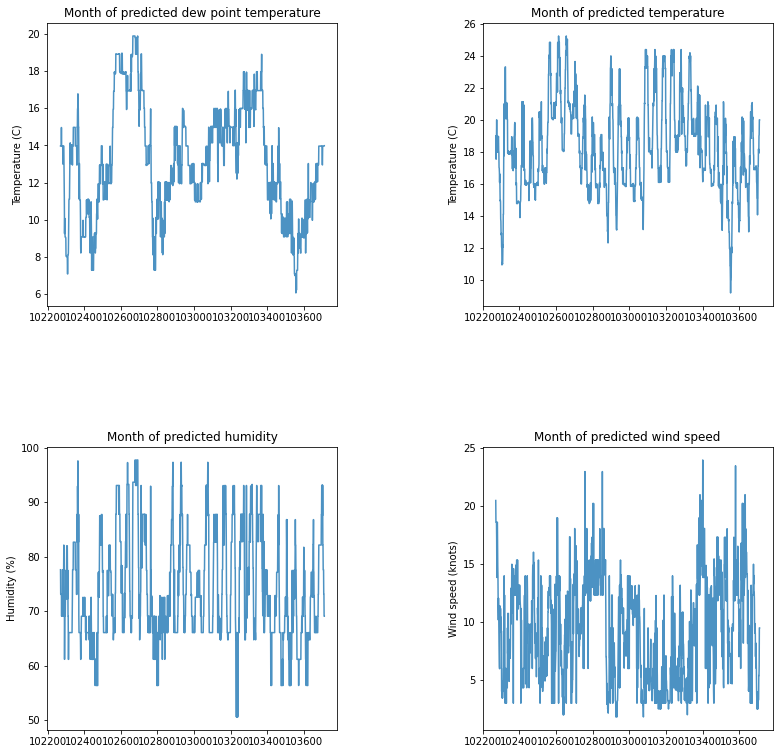

In [374]:
figure, axis = plt.subplots(2,2, figsize =(13,13))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

axis[0,0].plot(test['dwpc'], alpha=0.8);
axis[0,0].set_ylabel("Temperature (C)");
axis[0,0].set_title("Month of predicted dew point temperature");

axis[0,1].plot(test['tmpc'], alpha=0.8);
axis[0,1].set_ylabel("Temperature (C)");
axis[0,1].set_title("Month of predicted temperature");

axis[1,1].plot(test['sknt'], alpha=0.8);
axis[1,1].set_ylabel("Wind speed (knots)");
axis[1,1].set_title("Month of predicted wind speed");

axis[1,0].plot(test['relh'], alpha=0.8);
axis[1,0].set_ylabel("Humidity (%)");
axis[1,0].set_title("Month of predicted humidity");


# Conclusion

* Comment on your model performance.
* Anything interesting about the data analysis.